#Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2




#USING the cv2.kmeans function directly for image segmentation

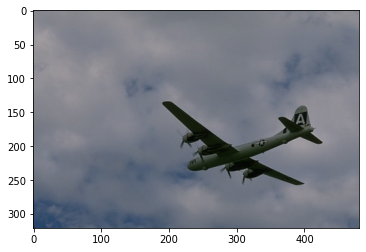

In [ ]:
%matplotlib inline

image = cv2.imread('/content/3096.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

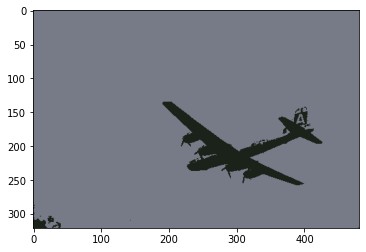

In [ ]:

criteria = (
    cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 150, 0.9
            )
#we set the max iterations to 150
#the epsilon value is 0.9
k_clusters = 2

x, y, c = cv2.kmeans(np.float32(image.reshape((-1,3))), 
                     k_clusters, None, 
                     criteria, 10, 
                     cv2.KMEANS_RANDOM_CENTERS)
#using the inbiult function cv2.kmeans above
# convert data into 8-bit values
tnec = np.uint8(c)

image_centered = tnec[y.flatten()]
 
# reshape data into the original image dimensions
final_image = image_centered.reshape((image.shape))
 
plt.imshow(final_image)

#Implementing K-Means from scratch on the numpy array of pixels

In [ ]:
data_image = cv2.imread("/content/3096.jpg")/255
data_image = cv2.cvtColor(data_image.astype(np.float32), cv2.COLOR_BGR2RGB)

In [ ]:
import pandas as pd


In [ ]:
from tqdm import tqdm

#k_clusters = 2

In [ ]:
from pandas._libs.index import Int16Engine
from pandas.core.dtypes.common import is_1d_only_ea_obj
image_reshaped=data_image.reshape((-1,3))
#treating image as a dataframe
img_df = pd.DataFrame(image_reshaped)
img_df.rename(columns={0:'Red', 1:'Green', 2: 'Blue'}, inplace =True)

k_clusters = 2
diff = 1
check=0
img_df
X = img_df

In [ ]:
print(X)

             Red     Green      Blue
0       0.529412  0.541176  0.560784
1       0.552941  0.564706  0.584314
2       0.541176  0.552941  0.572549
3       0.529412  0.541176  0.560784
4       0.529412  0.541176  0.568627
...          ...       ...       ...
154396  0.341176  0.388235  0.474510
154397  0.329412  0.380392  0.454902
154398  0.345098  0.388235  0.458824
154399  0.317647  0.364706  0.419608
154400  0.211765  0.250980  0.290196

[154401 rows x 3 columns]


#Starting the while loop till the centroids are found

In [ ]:

while(abs(diff)>0.05):
    X_data=X
    i=1
    #iterate over each centroid point
    centroids = (X.sample(n = k_clusters))
    for i1,row_lev_cent in centroids.iterrows():
        error_dist=[]
        print("distance between=")
        for i2,row_lev_dist in tqdm(X_data.iterrows()):
            distn=np.sqrt(((row_lev_cent["Red"]-row_lev_dist["Red"])**2)
            +((row_lev_cent["Green"]-row_lev_dist["Green"])**2)
            +((row_lev_cent["Blue"]-row_lev_dist["Blue"])**2))
            error_dist.append(distn)
        X[i]=error_dist
        i+=1

    C_clust=[]
    print("reaching the centroid")
    for ind,row_iter in tqdm(X.iterrows()):
        lowest_distance=row_iter[1]
        position_index=1
        for i in range(k_clusters):
            m=i+1
            if row_iter[m] < lowest_distance:
                lowest_distance = row_iter[m]
                position_index=m
        C_clust.append(position_index)
    X["Cluster_positions"]=C_clust
    centroids_new = X.groupby(["Cluster_positions"]).mean()[["Red","Green", "Blue"]]
    if check == 0:
        diff=1
        check=check+1
    else:
        #check if there is a difference between old and new centroids
        diff = (centroids_new['Red'] - centroids['Red']).sum() 
        + (centroids_new['Green'] - centroids['Green']).sum() 
        + (centroids_new['Blue'] - centroids['Blue']).sum()
        print("Difference betwn old and NEW : ",diff.sum())
    centroids = X.groupby(["Cluster_positions"]).mean()[["Red","Green","Blue"]]

distance between=


154401it [00:13, 11296.18it/s]


distance between=


154401it [00:13, 11744.19it/s]


reaching the centroid


154401it [00:09, 16865.37it/s]


distance between=


154401it [00:12, 12848.00it/s]


distance between=


154401it [00:11, 13428.26it/s]


reaching the centroid


154401it [00:09, 16050.25it/s]


Difference betwn old and NEW :  0.0


In [ ]:
centroids

,Red,Green,Blue
Cluster_positions,,,
1,0.401390,0.428063,0.474912
2,0.535567,0.536043,0.569179


In [ ]:
centroids = centroids.to_numpy()

In [ ]:
centroids

array([[0.40139022, 0.428063  , 0.47491202],
       [0.5355673 , 0.5360434 , 0.569179  ]], dtype=float32)

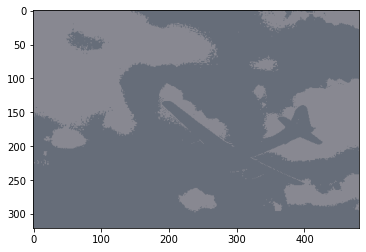

In [ ]:
data_image = cv2.cvtColor(data_image.astype(np.float32), cv2.COLOR_BGR2RGB)
labels = X["Cluster_positions"].to_numpy()

#overwritting the pixels values
image_centered = centroids[labels-1]
final_image = image_centered.reshape(data_image.shape)

#plotting the image
plt.imshow(final_image)

# k_clusters = 3

In [ ]:
from pandas._libs.index import Int16Engine
from pandas.core.dtypes.common import is_1d_only_ea_obj
image_reshaped=data_image.reshape((-1,3))
#treating image as a dataframe
img_df = pd.DataFrame(image_reshaped)
img_df.rename(columns={0:'Red', 1:'Green', 2: 'Blue'}, inplace =True)

k_clusters = 5
diff = 1
check=0
img_df
X = img_df

In [ ]:
print(X)

             Red     Green      Blue
0       0.529412  0.541176  0.560784
1       0.552941  0.564706  0.584314
2       0.541176  0.552941  0.572549
3       0.529412  0.541176  0.560784
4       0.529412  0.541176  0.568627
...          ...       ...       ...
154396  0.341176  0.388235  0.474510
154397  0.329412  0.380392  0.454902
154398  0.345098  0.388235  0.458824
154399  0.317647  0.364706  0.419608
154400  0.211765  0.250980  0.290196

[154401 rows x 3 columns]


#Starting the while loop till the centroids are found

In [ ]:

while(abs(diff)>0.05):
    X_data=X
    i=1
    #iterate over each centroid point
    centroids = (X.sample(n = k_clusters))
    for i1,row_lev_cent in centroids.iterrows():
        error_dist=[]
        print("distance between=")
        for i2,row_lev_dist in tqdm(X_data.iterrows()):
            distn=np.sqrt(((row_lev_cent["Red"]-row_lev_dist["Red"])**2)
            +((row_lev_cent["Green"]-row_lev_dist["Green"])**2)
            +((row_lev_cent["Blue"]-row_lev_dist["Blue"])**2))
            error_dist.append(distn)
        X[i]=error_dist
        i+=1

    C_clust=[]
    print("reaching the centroid")
    for ind,row_iter in tqdm(X.iterrows()):
        lowest_distance=row_iter[1]
        position_index=1
        for i in range(k_clusters):
            m=i+1
            if row_iter[m] < lowest_distance:
                lowest_distance = row_iter[m]
                position_index=m
        C_clust.append(position_index)
    X["Cluster_positions"]=C_clust
    centroids_new = X.groupby(["Cluster_positions"]).mean()[["Red","Green", "Blue"]]
    if check == 0:
        diff=1
        check=check+1
    else:
        #check if there is a difference between old and new centroids
        diff = (centroids_new['Red'] - centroids['Red']).sum() 
        + (centroids_new['Green'] - centroids['Green']).sum() 
        + (centroids_new['Blue'] - centroids['Blue']).sum()
        print("Difference betwn old and NEW : ",diff.sum())
    centroids = X.groupby(["Cluster_positions"]).mean()[["Red","Green","Blue"]]

distance between=


154401it [00:21, 7286.75it/s] 


distance between=


154401it [00:21, 7099.17it/s] 


distance between=


154401it [00:13, 11377.77it/s]


distance between=


154401it [00:13, 11378.82it/s]


distance between=


154401it [00:13, 11627.33it/s]


reaching the centroid


154401it [00:12, 12416.13it/s]


distance between=


154401it [00:11, 13641.79it/s]


distance between=


154401it [00:11, 13196.35it/s]


distance between=


154401it [00:11, 13592.01it/s]


distance between=


154401it [00:11, 13034.83it/s]


distance between=


154401it [00:12, 12616.97it/s]


reaching the centroid


154401it [00:12, 12801.20it/s]

Difference betwn old and NEW :  0.0


In [ ]:
centroids

,Red,Green,Blue
Cluster_positions,,,
1,0.489229,0.501158,0.542983
2,0.532426,0.532399,0.566020
3,0.294764,0.335731,0.381890
4,0.442930,0.465544,0.515637
5,0.571322,0.564979,0.591644


In [ ]:
centroids = centroids.to_numpy()

In [ ]:
centroids

array([[0.48922873, 0.5011585 , 0.54298306],
       [0.5324263 , 0.53239894, 0.5660205 ],
       [0.29476416, 0.3357314 , 0.38188964],
       [0.44293046, 0.46554446, 0.515637  ],
       [0.57132185, 0.5649788 , 0.59164447]], dtype=float32)

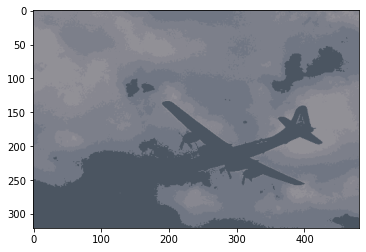

In [ ]:
data_image = cv2.cvtColor(data_image.astype(np.float32), cv2.COLOR_BGR2RGB)
labels = X["Cluster_positions"].to_numpy()

#overwritting the pixels values
image_centered = centroids[labels-1]
final_image = image_centered.reshape(data_image.shape)

#plotting the image
plt.imshow(final_image)

In [ ]:
cv2.imwrite('kmeans_op_3096.jpg',final_image*255)

True

REFERENCES:


*   https://medium.com/geekculture/implementing-k-means-clustering-with-k-means-initialization-in-python-7ca5a859d63a

*   https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/
*   https://medium.com/analytics-vidhya/image-segmentation-using-k-means-clustering-algorithm-python-cef588a79a63




COMPARING WITH groUND truth

In [ ]:
f = open('/content/3096.seg')
img = cv2.imread("/content/3096.jpg")
lines = f.readlines()
segarrlist = []
n_segments = int(lines[6].rstrip().split('segments')[1])
label_colours = np.random.randint(255,size=(100,3))
seg_img = np.zeros_like(img)
seg_data = lines[11:]
print(n_segments)
for i in range(n_segments):
  segarr = np.zeros_like(img)
  segarrlist.append(segarr)

for i in range(len(seg_data)):
  seg_data[i]=seg_data[i].rstrip()
df_arr=[]
for i in range(len(seg_data)):
  line = seg_data[i].split()
  line = list(map(int, line))
  df_arr.append(line)
  
for i in range(n_segments):
  for arr in df_arr:
    cluster, row, c1, c2 = arr
    #print(f'arr: {arr}')
    seg_img[row, c1:c2, :] = label_colours[cluster]
    segarrlist[cluster][row, c1:c2, :] = label_colours[cluster]

6


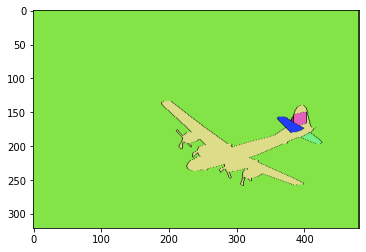

In [ ]:
plt.imshow(seg_img)

In [ ]:

import numpy as np
def get_iou(img_idx, seg_idx, image1, image2):
  intersection = np.logical_and(image1[img_idx],image2[seg_idx])
  union = np.logical_or(image1[img_idx],image2[seg_idx])
  iou_score = np.sum(intersection) / np.sum(union) if np.sum(union)>0 else 0
  return iou_score

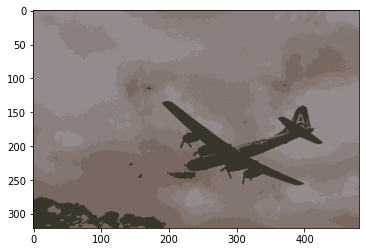

In [ ]:
plt.imshow(result_image)

In [ ]:
#creating img_list
result_image = final_image
unique_cols = np.unique(result_image.reshape(-1, result_image.shape[2]), axis=0)
print("unique pixels:",unique_cols)
blank_img = np.zeros_like(result_image)
mask_list = []
cnt=0
for pix in range(len(unique_cols)):
  print("^^^^^^^^^^^^^^",pix)
  #mask_list.append(blank_img)
  sample_img = np.zeros_like(result_image)
  print(sample_img.shape)

  sum=0
  for i in range(result_image.shape[0]):
    for j in range(result_image.shape[1]):
        if (np.array_equal(result_image[i][j],unique_cols[pix])):
          



          for k in range(result_image.shape[2]):

            sample_img[i,j,k]=result_image[i,j,k]
            
            sum=sum+1
  print(sum)
  cnt=cnt+1
  mask_list.append(sample_img)

unique pixels: [[0.22317849 0.21143867 0.16565035]
 [0.4766807  0.41103807 0.37358034]
 [0.5171153  0.46533576 0.44222608]
 [0.5414537  0.50059867 0.48891857]
 [0.57697797 0.54640657 0.5490793 ]]
^^^^^^^^^^^^^^ 0
(321, 481, 3)
40197
^^^^^^^^^^^^^^ 1
(321, 481, 3)
72792
^^^^^^^^^^^^^^ 2
(321, 481, 3)
101460
^^^^^^^^^^^^^^ 3
(321, 481, 3)
142509
^^^^^^^^^^^^^^ 4
(321, 481, 3)
106245


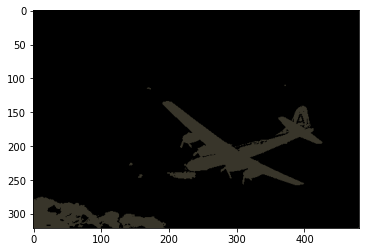

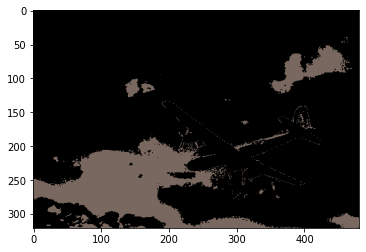

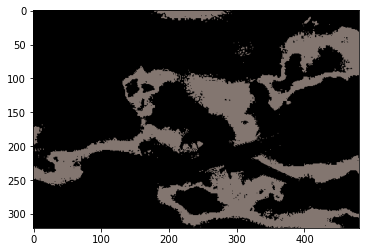

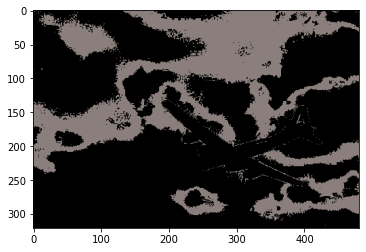

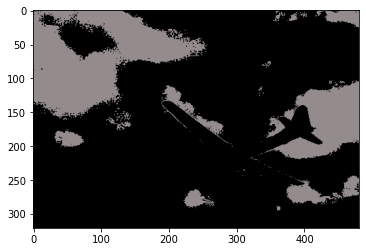

In [ ]:
for i in range(len(mask_list)):
  plt.figure()
  plt.imshow(mask_list[i])
  plt.show()

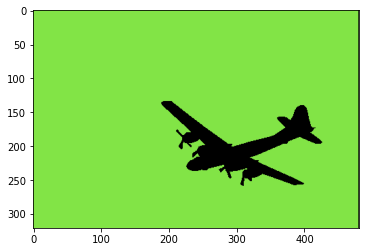

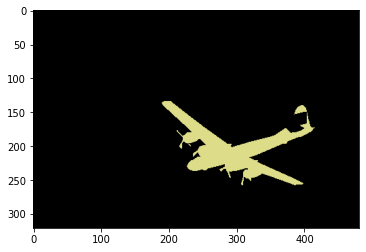

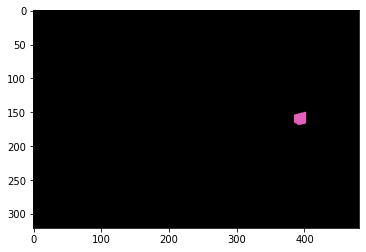

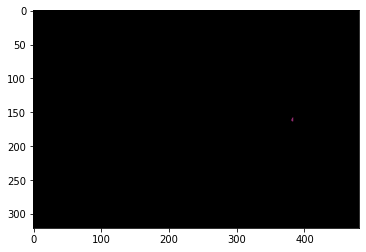

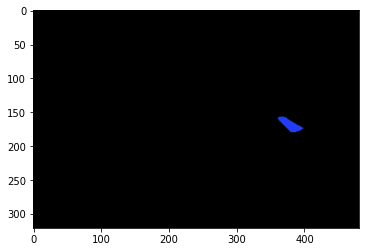

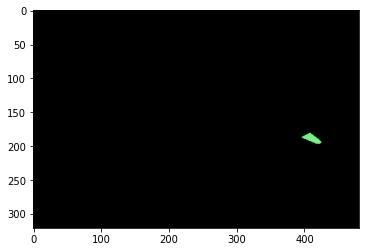

In [ ]:

for i in range(len(segarrlist)):
  plt.figure()
  plt.imshow(segarrlist[i])
  plt.show()

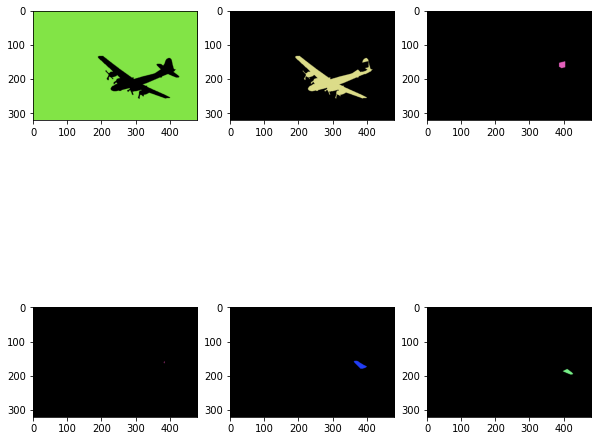

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10)) 
for i in range(len(segarrlist)):
  plt.subplot(2,3,i+1)
  plt.imshow(segarrlist[i])


iou: 0.015803853991259394
iou: 0.6161891369309194
iou: 0.019605985982193597
iou: 0.0002861776209100448
iou: 0.03756674294431731
iou: 0.02205461141875119


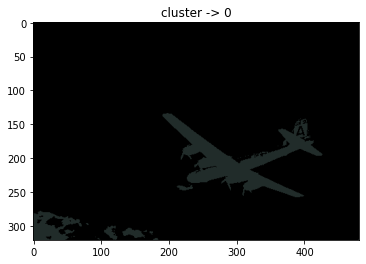

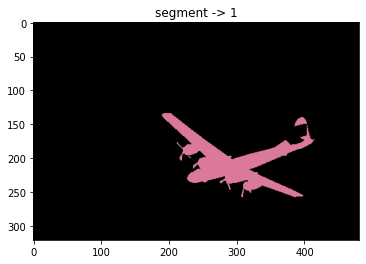

maxiou: 0.6161891369309194
iou: 0.12483764783496086
iou: 0.028216146328478534
iou: 0.0015992571192736276
iou: 0.0004182350480970305
iou: 0.0004097520999795124
iou: 5.1668905652578275e-05


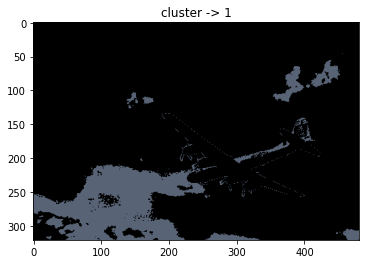

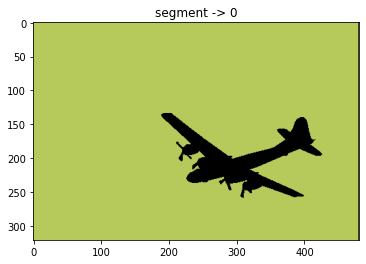

maxiou: 0.12483764783496086
iou: 0.22749642800444514
iou: 0.0027752081406105457
iou: 0.0009243522080090646
iou: 0.0
iou: 0.00011876131943825896
iou: 0.0


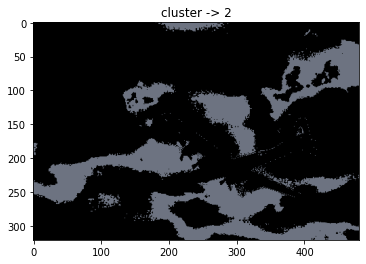

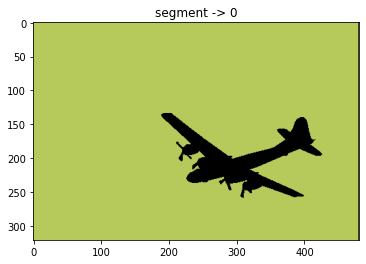

maxiou: 0.22749642800444514
iou: 0.33083573885060014
iou: 0.0006424785394321203
iou: 0.0004749907067035645
iou: 4.1524790299808984e-05
iou: 4.118616144975288e-05
iou: 0.0


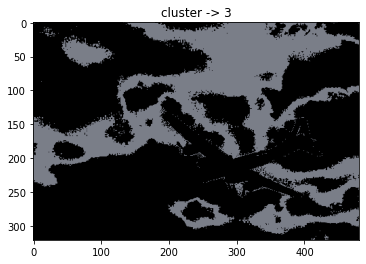

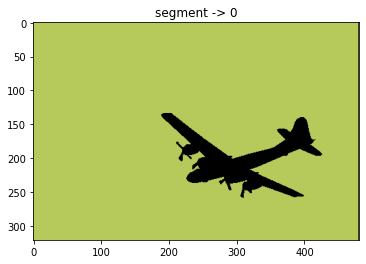

maxiou: 0.33083573885060014
iou: 0.29772130921143486
iou: 0.0002535150841475068
iou: 0.0
iou: 0.0
iou: 2.2839393385711677e-05
iou: 0.0


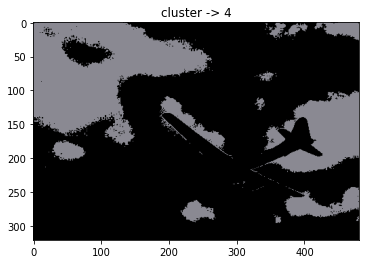

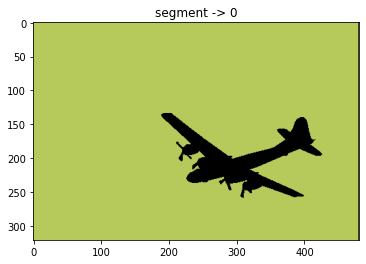

maxiou: 0.29772130921143486
maxiou overall: 0.6161891369309194
mean iou: 0.31941605216647206


In [ ]:
maxiou = 0
maxious = []
img_list = mask_list
for i in range(len(img_list)):
  ious = []
  
  for j in range(len(segarrlist)):
    iou_score = get_iou(i,j, img_list, segarrlist)
    print(f'iou: {iou_score}')
    ious.append(iou_score)
  maxj = np.argmax(ious)
  maxiou_loc = np.max(ious)
  maxious.append(maxiou_loc)
  maxiou = max(maxiou, maxiou_loc)

  plt.figure()
  plt.imshow(img_list[i])
  plt.title(f'cluster -> {i}')
  plt.show()
  plt.figure()
  plt.imshow(segarrlist[maxj])
  plt.title(f'segment -> {maxj}')
  plt.show()
  print(f'maxiou: {np.max(ious)}')

print(f'maxiou overall: {maxiou}')
print(f'mean iou: {np.mean(maxious)}')

  


<h1><b>IMAGE 35038

In [ ]:
data_image = cv2.imread("/content/35058.jpeg")/255
data_image = cv2.cvtColor(data_image.astype(np.float32), cv2.COLOR_BGR2RGB)

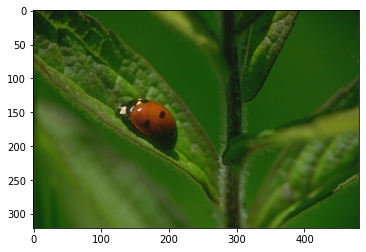

In [ ]:
plt.imshow(data_image)

In [ ]:
from pandas._libs.index import Int16Engine
from pandas.core.dtypes.common import is_1d_only_ea_obj
image_reshaped=data_image.reshape((-1,3))
#treating image as a dataframe
img_df = pd.DataFrame(image_reshaped)
img_df.rename(columns={0:'Red', 1:'Green', 2: 'Blue'}, inplace =True)

k_clusters = 5
diff = 1
check=0
img_df
X = img_df

In [ ]:
print(X)

             Red     Green      Blue
0       0.066667  0.086275  0.058824
1       0.082353  0.105882  0.058824
2       0.054902  0.094118  0.000000
3       0.223529  0.266667  0.141176
4       0.250980  0.309804  0.141176
...          ...       ...       ...
154396  0.074510  0.258824  0.054902
154397  0.078431  0.250980  0.050980
154398  0.078431  0.250980  0.050980
154399  0.078431  0.250980  0.050980
154400  0.074510  0.247059  0.047059

[154401 rows x 3 columns]


#Starting the while loop till the centroids are found

In [ ]:

while(abs(diff)>0.05):
    X_data=X
    i=1
    #iterate over each centroid point
    centroids = (X.sample(n = k_clusters))
    for i1,row_lev_cent in centroids.iterrows():
        error_dist=[]
        print("distance between=")
        for i2,row_lev_dist in tqdm(X_data.iterrows()):
            distn=np.sqrt(((row_lev_cent["Red"]-row_lev_dist["Red"])**2)
            +((row_lev_cent["Green"]-row_lev_dist["Green"])**2)
            +((row_lev_cent["Blue"]-row_lev_dist["Blue"])**2))
            error_dist.append(distn)
        X[i]=error_dist
        i+=1

    C_clust=[]
    print("reaching the centroid")
    for ind,row_iter in tqdm(X.iterrows()):
        lowest_distance=row_iter[1]
        position_index=1
        for i in range(k_clusters):
            m=i+1
            if row_iter[m] < lowest_distance:
                lowest_distance = row_iter[m]
                position_index=m
        C_clust.append(position_index)
    X["Cluster_positions"]=C_clust
    centroids_new = X.groupby(["Cluster_positions"]).mean()[["Red","Green", "Blue"]]
    if check == 0:
        diff=1
        check=check+1
    else:
        #check if there is a difference between old and new centroids
        diff = (centroids_new['Red'] - centroids['Red']).sum() 
        + (centroids_new['Green'] - centroids['Green']).sum() 
        + (centroids_new['Blue'] - centroids['Blue']).sum()
        print("Difference betwn old and NEW : ",diff.sum())
    centroids = X.groupby(["Cluster_positions"]).mean()[["Red","Green","Blue"]]

distance between=


154401it [00:13, 11517.81it/s]


distance between=


154401it [00:13, 11811.30it/s]


distance between=


154401it [00:13, 11680.10it/s]


distance between=


154401it [00:13, 11348.25it/s]


distance between=


154401it [00:13, 11142.46it/s]


reaching the centroid


154401it [00:11, 13140.93it/s]


distance between=


154401it [00:11, 13554.62it/s]


distance between=


154401it [00:12, 12825.93it/s]


distance between=


154401it [00:11, 13778.49it/s]


distance between=


154401it [00:11, 13721.22it/s]


distance between=


154401it [00:11, 13546.72it/s]


reaching the centroid


154401it [00:11, 13146.49it/s]

Difference betwn old and NEW :  0.0


In [ ]:
centroids

,Red,Green,Blue
Cluster_positions,,,
1,0.264705,0.378762,0.091478
2,0.127636,0.313832,0.044397
3,0.210885,0.333320,0.071792
4,0.360634,0.447576,0.172444
5,0.102578,0.199989,0.052872


In [ ]:
centroids = centroids.to_numpy()

In [ ]:
centroids

array([[0.26470518, 0.37876204, 0.09147799],
       [0.12763551, 0.3138317 , 0.04439725],
       [0.21088485, 0.3333197 , 0.07179175],
       [0.36063388, 0.4475762 , 0.1724445 ],
       [0.10257819, 0.19998921, 0.05287221]], dtype=float32)

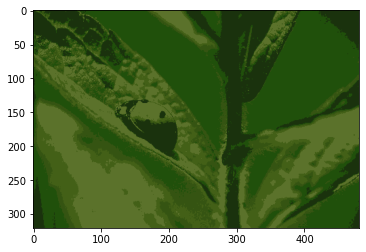

In [ ]:
data_image = cv2.cvtColor(data_image.astype(np.float32), cv2.COLOR_BGR2RGB)
labels = X["Cluster_positions"].to_numpy()

#overwritting the pixels values
image_centered = centroids[labels-1]
final_image = image_centered.reshape(data_image.shape)

#plotting the image
plt.imshow(final_image)

COMPARING WITH groUND truth

In [ ]:
f = open('/content/35058.seg')
img = cv2.imread("/content/35058.jpeg")
lines = f.readlines()
segarrlist = []
n_segments = int(lines[6].rstrip().split('segments')[1])
label_colours = np.random.randint(255,size=(100,3))
seg_img = np.zeros_like(img)
seg_data = lines[11:]
print(n_segments)
for i in range(n_segments):
  segarr = np.zeros_like(img)
  segarrlist.append(segarr)

for i in range(len(seg_data)):
  seg_data[i]=seg_data[i].rstrip()
df_arr=[]
for i in range(len(seg_data)):
  line = seg_data[i].split()
  line = list(map(int, line))
  df_arr.append(line)
  
for i in range(n_segments):
  for arr in df_arr:
    cluster, row, c1, c2 = arr
    #print(f'arr: {arr}')
    seg_img[row, c1:c2, :] = label_colours[cluster]
    segarrlist[cluster][row, c1:c2, :] = label_colours[cluster]

10


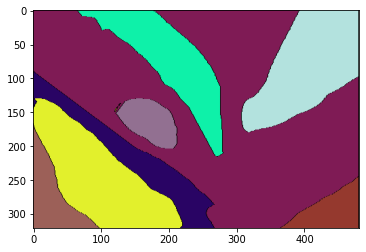

In [ ]:
plt.imshow(seg_img)

In [ ]:
import numpy as np
def get_iou(img_idx, seg_idx, image1, image2):
  intersection = np.logical_and(image1[img_idx],image2[seg_idx])
  union = np.logical_or(image1[img_idx],image2[seg_idx])
  iou_score = np.sum(intersection) / np.sum(union) if np.sum(union)>0 else 0
  return iou_score

In [ ]:
#creating img_list
result_image = final_image
unique_cols = np.unique(result_image.reshape(-1, result_image.shape[2]), axis=0)
print("unique pixels:",unique_cols)
blank_img = np.zeros_like(result_image)
mask_list = []
cnt=0
for pix in range(len(unique_cols)):
  print("^^^^^^^^^^^^^^",pix)
  #mask_list.append(blank_img)
  sample_img = np.zeros_like(result_image)
  print(sample_img.shape)

  sum=0
  for i in range(result_image.shape[0]):
    for j in range(result_image.shape[1]):
        if (np.array_equal(result_image[i][j],unique_cols[pix])):
          



          for k in range(result_image.shape[2]):

            sample_img[i,j,k]=result_image[i,j,k]
            
            sum=sum+1
  print(sum)
  cnt=cnt+1
  mask_list.append(sample_img)

unique pixels: [[0.10257819 0.19998921 0.05287221]
 [0.12763551 0.3138317  0.04439725]
 [0.21088485 0.3333197  0.07179175]
 [0.26470518 0.37876204 0.09147799]
 [0.36063388 0.4475762  0.1724445 ]]
^^^^^^^^^^^^^^ 0
(321, 481, 3)
79575
^^^^^^^^^^^^^^ 1
(321, 481, 3)
156780
^^^^^^^^^^^^^^ 2
(321, 481, 3)
59502
^^^^^^^^^^^^^^ 3
(321, 481, 3)
65610
^^^^^^^^^^^^^^ 4
(321, 481, 3)
101736


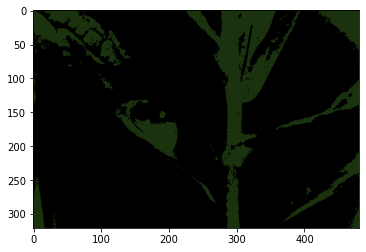

In [ ]:
plt.imshow(mask_list[0])

iou: 0.2495874637884881
iou: 0.000931258424212719
iou: 0.0457635009310987
iou: 0.002975540511028609
iou: 0.00021773684325124656
iou: 0.08872419269454739
iou: 0.0
iou: 3.769744034380066e-05
iou: 0.026668790823641868
iou: 0.007248261067412078


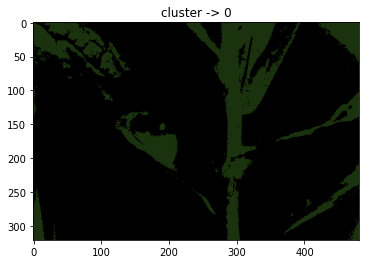

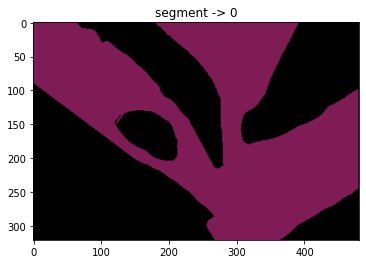

maxiou: 0.2495874637884881
iou: 0.09720650272661796
iou: 0.252125178665463
iou: 0.2956524928030511
iou: 0.07862297572597632
iou: 0.004217399223774362
iou: 0.00044201630156120157
iou: 0.0
iou: 0.0
iou: 0.04835033644454092
iou: 0.06348194532978364


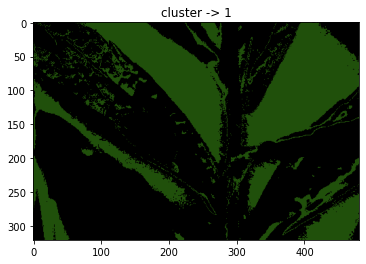

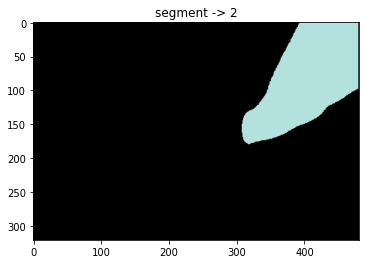

maxiou: 0.2956524928030511
iou: 0.1392270727257551
iou: 0.018307591388872325
iou: 0.0072975393856367565
iou: 0.13473302620647987
iou: 0.038446273119360726
iou: 0.010414488268016229
iou: 0.0
iou: 0.0
iou: 0.038901322482197354
iou: 0.02514555733693359


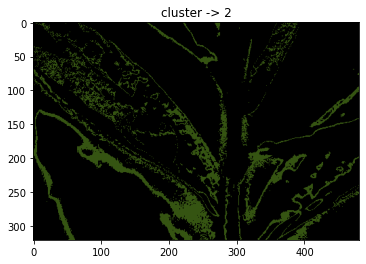

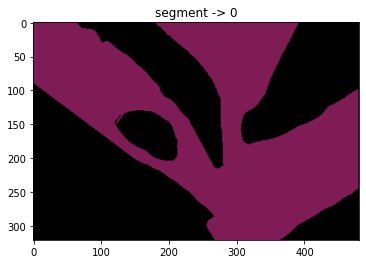

maxiou: 0.1392270727257551
iou: 0.16405998353673812
iou: 0.004998889135747611
iou: 0.000720640127230257
iou: 0.05535637930467388
iou: 0.12313635868973773
iou: 0.010726964037660132
iou: 0.0
iou: 0.0
iou: 0.0315446789402784
iou: 0.009390931043734908


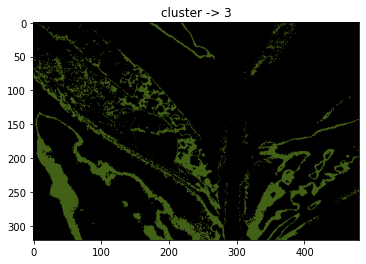

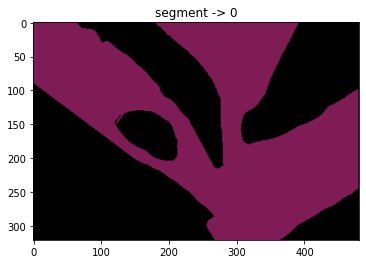

maxiou: 0.16405998353673812
iou: 0.20331298849565294
iou: 0.0016614745586708203
iou: 9.558767301368816e-05
iou: 0.006890886688267239
iou: 0.3264016715586289
iou: 0.03402022824382065
iou: 0.0
iou: 5.897443458260844e-05
iou: 0.009892659544631702
iou: 0.0003649444763046765


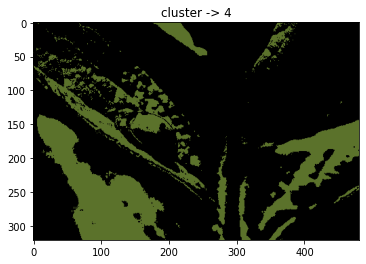

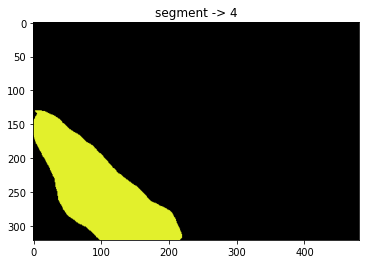

maxiou: 0.3264016715586289
maxiou overall: 0.3264016715586289
mean iou: 0.23498573688253227


In [ ]:
maxiou = 0
maxious = []
img_list = mask_list
for i in range(len(img_list)):
  ious = []
  
  for j in range(len(segarrlist)):
    iou_score = get_iou(i,j, img_list, segarrlist)
    print(f'iou: {iou_score}')
    ious.append(iou_score)
  maxj = np.argmax(ious)
  maxiou_loc = np.max(ious)
  maxious.append(maxiou_loc)
  maxiou = max(maxiou, maxiou_loc)

  plt.figure()
  plt.imshow(img_list[i])
  plt.title(f'cluster -> {i}')
  plt.show()
  plt.figure()
  plt.imshow(segarrlist[maxj])
  plt.title(f'segment -> {maxj}')
  plt.show()
  print(f'maxiou: {np.max(ious)}')

print(f'maxiou overall: {maxiou}')
print(f'mean iou: {np.mean(maxious)}')

  


<h1><b>IMAGE 222090

In [ ]:
data_image = cv2.imread("/content/25098.jpeg")/255
data_image = cv2.cvtColor(data_image.astype(np.float32), cv2.COLOR_BGR2RGB)

NameError: ignored

In [ ]:
plt.imshow(data_image)

NameError: ignored

In [ ]:
from pandas._libs.index import Int16Engine
from pandas.core.dtypes.common import is_1d_only_ea_obj
image_reshaped=data_image.reshape((-1,3))
#treating image as a dataframe
img_df = pd.DataFrame(image_reshaped)
img_df.rename(columns={0:'Red', 1:'Green', 2: 'Blue'}, inplace =True)

k_clusters = 5
diff = 1
check=0
img_df
X = img_df

In [ ]:
print(X)

             Red     Green      Blue
0       0.137255  0.235294  0.000000
1       0.137255  0.235294  0.000000
2       0.184314  0.282353  0.027451
3       0.196078  0.290196  0.047059
4       0.152941  0.235294  0.015686
...          ...       ...       ...
154396  0.815686  0.760784  0.513726
154397  0.839216  0.784314  0.529412
154398  0.827451  0.772549  0.517647
154399  0.847059  0.792157  0.537255
154400  0.827451  0.784314  0.525490

[154401 rows x 3 columns]


#Starting the while loop till the centroids are found

In [ ]:

while(abs(diff)>0.05):
    X_data=X
    i=1
    #iterate over each centroid point
    centroids = (X.sample(n = k_clusters))
    for i1,row_lev_cent in centroids.iterrows():
        error_dist=[]
        print("distance between=")
        for i2,row_lev_dist in tqdm(X_data.iterrows()):
            distn=np.sqrt(((row_lev_cent["Red"]-row_lev_dist["Red"])**2)
            +((row_lev_cent["Green"]-row_lev_dist["Green"])**2)
            +((row_lev_cent["Blue"]-row_lev_dist["Blue"])**2))
            error_dist.append(distn)
        X[i]=error_dist
        i+=1

    C_clust=[]
    print("reaching the centroid")
    for ind,row_iter in tqdm(X.iterrows()):
        lowest_distance=row_iter[1]
        position_index=1
        for i in range(k_clusters):
            m=i+1
            if row_iter[m] < lowest_distance:
                lowest_distance = row_iter[m]
                position_index=m
        C_clust.append(position_index)
    X["Cluster_positions"]=C_clust
    centroids_new = X.groupby(["Cluster_positions"]).mean()[["Red","Green", "Blue"]]
    if check == 0:
        diff=1
        check=check+1
    else:
        #check if there is a difference between old and new centroids
        diff = (centroids_new['Red'] - centroids['Red']).sum() 
        + (centroids_new['Green'] - centroids['Green']).sum() 
        + (centroids_new['Blue'] - centroids['Blue']).sum()
        print("Difference betwn old and NEW : ",diff.sum())
    centroids = X.groupby(["Cluster_positions"]).mean()[["Red","Green","Blue"]]

distance between=


154401it [00:14, 10317.68it/s]


distance between=


154401it [00:19, 8117.10it/s] 


distance between=


154401it [00:13, 11658.27it/s]


distance between=


154401it [00:13, 11678.48it/s]


distance between=


154401it [00:13, 11614.97it/s]


reaching the centroid


154401it [00:11, 13135.72it/s]


distance between=


154401it [00:11, 13621.14it/s]


distance between=


154401it [00:11, 13689.72it/s]


distance between=


154401it [00:11, 13643.57it/s]


distance between=


154401it [00:11, 13052.59it/s]


distance between=


154401it [00:11, 13665.21it/s]


reaching the centroid


154401it [00:12, 12586.69it/s]


Difference betwn old and NEW :  0.0


In [ ]:
centroids

,Red,Green,Blue
Cluster_positions,,,
1,0.473369,0.472246,0.193786
2,0.781664,0.374870,0.232304
3,0.337663,0.321033,0.072700
4,0.769782,0.657238,0.327536
5,0.176109,0.135196,0.021907


In [ ]:
centroids = centroids.to_numpy()

In [ ]:
centroids

array([[0.473369  , 0.47224572, 0.19378637],
       [0.7816644 , 0.37486994, 0.23230368],
       [0.33766338, 0.32103273, 0.0726997 ],
       [0.76978165, 0.6572384 , 0.32753587],
       [0.17610888, 0.13519591, 0.02190699]], dtype=float32)

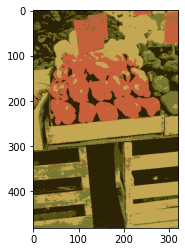

In [ ]:
data_image = cv2.cvtColor(data_image.astype(np.float32), cv2.COLOR_BGR2RGB)
labels = X["Cluster_positions"].to_numpy()

#overwritting the pixels values
image_centered = centroids[labels-1]
final_image = image_centered.reshape(data_image.shape)

#plotting the image
plt.imshow(final_image)

COMPARING WITH groUND truth

In [ ]:
f = open('/content/25098.seg')
img = cv2.imread("/content/25098.jpeg")
lines = f.readlines()
segarrlist = []
n_segments = int(lines[6].rstrip().split('segments')[1])
label_colours = np.random.randint(255,size=(100,3))
seg_img = np.zeros_like(img)
seg_data = lines[11:]
print(n_segments)
for i in range(n_segments):
  segarr = np.zeros_like(img)
  segarrlist.append(segarr)

for i in range(len(seg_data)):
  seg_data[i]=seg_data[i].rstrip()
df_arr=[]
for i in range(len(seg_data)):
  line = seg_data[i].split()
  line = list(map(int, line))
  df_arr.append(line)
  
for i in range(n_segments):
  for arr in df_arr:
    cluster, row, c1, c2 = arr
    #print(f'arr: {arr}')
    seg_img[row, c1:c2, :] = label_colours[cluster]
    segarrlist[cluster][row, c1:c2, :] = label_colours[cluster]

54


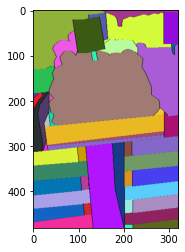

In [ ]:
plt.imshow(seg_img)

In [ ]:
import numpy as np
def get_iou(img_idx, seg_idx, image1, image2):
  intersection = np.logical_and(image1[img_idx],image2[seg_idx])
  union = np.logical_or(image1[img_idx],image2[seg_idx])
  iou_score = np.sum(intersection) / np.sum(union) if np.sum(union)>0 else 0
  return iou_score

In [ ]:
#creating img_list
result_image = final_image
unique_cols = np.unique(result_image.reshape(-1, result_image.shape[2]), axis=0)
print("unique pixels:",unique_cols)
blank_img = np.zeros_like(result_image)
mask_list = []
cnt=0
for pix in range(len(unique_cols)):
  print("^^^^^^^^^^^^^^",pix)
  #mask_list.append(blank_img)
  sample_img = np.zeros_like(result_image)
  print(sample_img.shape)

  sum=0
  for i in range(result_image.shape[0]):
    for j in range(result_image.shape[1]):
        if (np.array_equal(result_image[i][j],unique_cols[pix])):
          



          for k in range(result_image.shape[2]):

            sample_img[i,j,k]=result_image[i,j,k]
            
            sum=sum+1
  print(sum)
  cnt=cnt+1
  mask_list.append(sample_img)

unique pixels: [[0.17610888 0.13519591 0.02190699]
 [0.33766338 0.32103273 0.0726997 ]
 [0.473369   0.47224572 0.19378637]
 [0.76978165 0.6572384  0.32753587]
 [0.7816644  0.37486994 0.23230368]]
^^^^^^^^^^^^^^ 0
(481, 321, 3)
126978
^^^^^^^^^^^^^^ 1
(481, 321, 3)
35916
^^^^^^^^^^^^^^ 2
(481, 321, 3)
61845
^^^^^^^^^^^^^^ 3
(481, 321, 3)
141327
^^^^^^^^^^^^^^ 4
(481, 321, 3)
97137


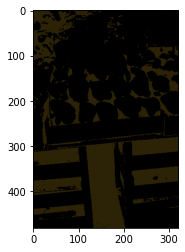

In [ ]:
plt.imshow(mask_list[0])

iou: 0.12437262028383524
iou: 0.0012447099825740602
iou: 0.00027804810232170165
iou: 0.0
iou: 0.006619299204469545
iou: 0.0004072970481682351
iou: 0.0
iou: 0.00015847501754544837
iou: 9.062280522893586e-05
iou: 0.0
iou: 0.06427151435656754
iou: 0.0
iou: 0.057609347770191124
iou: 0.0
iou: 0.002319454140113045
iou: 0.000657342974363624
iou: 0.0170578666046944
iou: 0.0002594890424854332
iou: 0.0010327668763496385
iou: 0.00110958968789839
iou: 0.0
iou: 0.0020477815699658703
iou: 0.0023569341001225606
iou: 0.001280439007659769
iou: 0.0008940755729142158
iou: 0.00135882566840826
iou: 0.012402346013862808
iou: 0.006292308391258916
iou: 0.07695573217612792
iou: 0.0002593422138394436
iou: 0.00016343302748009618
iou: 0.019195837911779874
iou: 0.2503412246434791
iou: 0.001097464157287629
iou: 0.06924000847836838
iou: 0.0
iou: 0.0009969873642688399
iou: 0.00038897893030794163
iou: 0.07528295684027615
iou: 0.00032656869605784933
iou: 0.0004441846873173583
iou: 0.06691449814126393
iou: 0.0
iou: 0.00

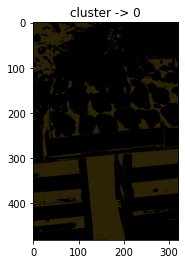

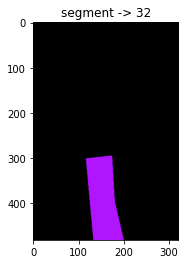

maxiou: 0.2503412246434791
iou: 0.1271049476044002
iou: 0.01498209456990426
iou: 0.0009372071227741331
iou: 0.0003527336860670194
iou: 0.06112389089714098
iou: 0.0018422991893883567
iou: 0.0
iou: 0.0030474531998258597
iou: 0.0013798111837327524
iou: 0.0
iou: 0.11182684875032209
iou: 0.0004132914531327492
iou: 0.00861193202807536
iou: 8.21422704123542e-05
iou: 0.012372166201816491
iou: 0.0038576315597932892
iou: 0.02116966189460859
iou: 0.0004982561036372695
iou: 0.0011400651465798045
iou: 0.0009136212624584717
iou: 0.0
iou: 0.0012292059329673032
iou: 0.001645548790521639
iou: 0.004260089686098654
iou: 0.005445544554455445
iou: 0.004572891896835559
iou: 0.016563621097626137
iou: 0.011680208937899013
iou: 0.0011116196952854246
iou: 0.005078677878611273
iou: 0.00048084628946946624
iou: 0.09241568968012737
iou: 0.0029059528002817895
iou: 0.002241613962052678
iou: 0.00803912373551283
iou: 0.0
iou: 0.0014549595141700406
iou: 0.0022007042253521128
iou: 0.003053732700929114
iou: 0.002480198415

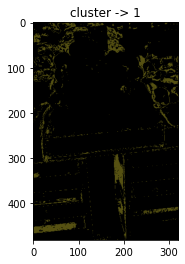

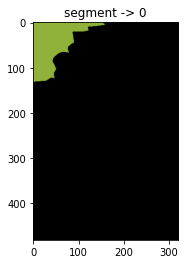

maxiou: 0.1271049476044002
iou: 0.049306518723994455
iou: 0.0024916573971078978
iou: 0.004305705059203444
iou: 0.007726951607205934
iou: 0.05438055095589342
iou: 0.010527594444669393
iou: 0.0
iou: 0.0030806321993035093
iou: 0.00035676061362825543
iou: 0.0
iou: 0.14967280474813574
iou: 0.004016841697720563
iou: 0.00042060184300080295
iou: 9.607993850883935e-05
iou: 0.012793745280085292
iou: 0.006369712465796438
iou: 0.016126802746164126
iou: 0.000773881499395405
iou: 0.0066833349360515435
iou: 0.0008705745792222867
iou: 0.0
iou: 0.003897978825794033
iou: 0.0035190898573081372
iou: 0.009786883746455685
iou: 0.005018094089264174
iou: 0.012871418172192443
iou: 0.024252600158574694
iou: 0.05758966195336642
iou: 0.00175651373844674
iou: 0.00135350703340262
iou: 0.0010898407884761183
iou: 0.03383998954749358
iou: 0.0031286913769434602
iou: 0.010167549763711871
iou: 0.0006335797254487857
iou: 0.0
iou: 0.009695119435620281
iou: 0.12390270665691294
iou: 0.0040862277446524625
iou: 0.0017031745280

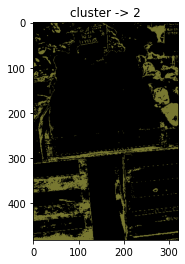

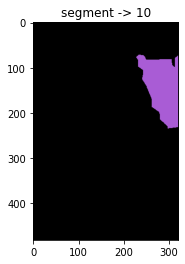

maxiou: 0.14967280474813574
iou: 0.000581774588791143
iou: 0.025305866359928892
iou: 0.0001459975806115213
iou: 0.0021947204779613487
iou: 0.08998020435504189
iou: 0.0022010986014258443
iou: 0.0
iou: 0.0367162851758528
iou: 0.03788714467543487
iou: 0.0
iou: 0.0062812732886191845
iou: 0.00042354934349851756
iou: 0.04831823804013885
iou: 0.001990766233216146
iou: 0.03374297458266924
iou: 0.03317285358334389
iou: 0.0015472850305330913
iou: 0.0008484462827447237
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.00025346936189088145
iou: 0.0
iou: 0.0238822959043865
iou: 0.0
iou: 0.18701671239710652
iou: 0.00136394635144351
iou: 0.0035166632590472296
iou: 0.0
iou: 0.0
iou: 0.010053661950919465
iou: 0.0042383046781287485
iou: 6.907150627687313e-05
iou: 0.005103977728097187
iou: 0.0
iou: 0.0
iou: 0.07213025095185006
iou: 0.0204995004995005
iou: 0.0021002991935643663
iou: 0.01010807374443738
iou: 0.006771483589732738
iou: 0.0
iou: 0.0
iou: 0.0704806654390755
iou: 0.0
iou: 0.03844897292440887
iou: 0.03820611795

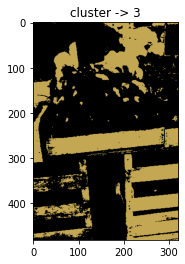

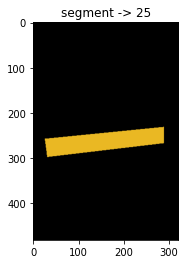

maxiou: 0.18701671239710652
iou: 0.00011898812498512649
iou: 0.011502728211178292
iou: 0.022183250261522368
iou: 0.05877491046009735
iou: 0.0003520506953001232
iou: 0.11950855156854974
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.00021442355800157243
iou: 0.0007079754978914643
iou: 0.58486646884273
iou: 0.003263948762162828
iou: 0.0003183607316508451
iou: 0.0007315503013987242
iou: 2.9571800331204164e-05
iou: 9.244422531739184e-05
iou: 0.003837180746561886
iou: 9.24356801725466e-05
iou: 0.0
iou: 0.0015656658684840672
iou: 0.0002763109419132998
iou: 0.00014775850350187653
iou: 0.00018412250283855524
iou: 0.010468332697443725
iou: 0.00023726903342527507
iou: 0.003886729594669628
iou: 0.0004481667180191031
iou: 0.0
iou: 6.081060536957646e-05
iou: 2.8168220613503847e-05
iou: 0.0
iou: 0.000516576012640919
iou: 0.0
iou: 0.0
iou: 0.0034891448825875057
iou: 0.004921477549214776
iou: 0.00025114410090411874
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.0028313671061762666
iou: 0.000

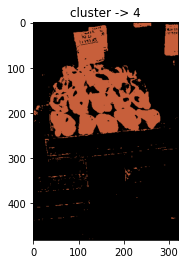

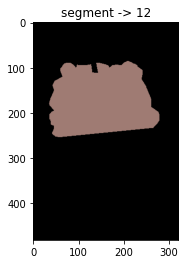

maxiou: 0.58486646884273
maxiou overall: 0.58486646884273
mean iou: 0.25980043164717026


In [ ]:
maxiou = 0
maxious = []
img_list = mask_list
for i in range(len(img_list)):
  ious = []
  
  for j in range(len(segarrlist)):
    iou_score = get_iou(i,j, img_list, segarrlist)
    print(f'iou: {iou_score}')
    ious.append(iou_score)
  maxj = np.argmax(ious)
  maxiou_loc = np.max(ious)
  maxious.append(maxiou_loc)
  maxiou = max(maxiou, maxiou_loc)

  plt.figure()
  plt.imshow(img_list[i])
  plt.title(f'cluster -> {i}')
  plt.show()
  plt.figure()
  plt.imshow(segarrlist[maxj])
  plt.title(f'segment -> {maxj}')
  plt.show()
  print(f'maxiou: {np.max(ious)}')

print(f'maxiou overall: {maxiou}')
print(f'mean iou: {np.mean(maxious)}')

  


IMAGE 3096

<h1><b>IMAGE 22090

In [ ]:
data_image = cv2.imread("/content/22090.jpeg")/255
data_image = cv2.cvtColor(data_image.astype(np.float32), cv2.COLOR_BGR2RGB)

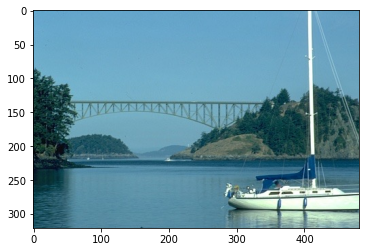

In [ ]:
plt.imshow(data_image)

In [ ]:
from pandas._libs.index import Int16Engine
from pandas.core.dtypes.common import is_1d_only_ea_obj
image_reshaped=data_image.reshape((-1,3))
#treating image as a dataframe
img_df = pd.DataFrame(image_reshaped)
img_df.rename(columns={0:'Red', 1:'Green', 2: 'Blue'}, inplace =True)

k_clusters = 5
diff = 1
check=0
img_df
X = img_df

In [ ]:
print(X)

             Red     Green      Blue
0       0.392157  0.666667  0.807843
1       0.392157  0.666667  0.807843
2       0.384314  0.658824  0.800000
3       0.380392  0.654902  0.796078
4       0.396078  0.670588  0.811765
...          ...       ...       ...
154396  0.521569  0.674510  0.694118
154397  0.529412  0.682353  0.701961
154398  0.509804  0.654902  0.678431
154399  0.466667  0.611765  0.635294
154400  0.454902  0.600000  0.623529

[154401 rows x 3 columns]


#Starting the while loop till the centroids are found

In [ ]:

while(abs(diff)>0.05):
    X_data=X
    i=1
    #iterate over each centroid point
    centroids = (X.sample(n = k_clusters))
    for i1,row_lev_cent in centroids.iterrows():
        error_dist=[]
        print("distance between=")
        for i2,row_lev_dist in tqdm(X_data.iterrows()):
            distn=np.sqrt(((row_lev_cent["Red"]-row_lev_dist["Red"])**2)
            +((row_lev_cent["Green"]-row_lev_dist["Green"])**2)
            +((row_lev_cent["Blue"]-row_lev_dist["Blue"])**2))
            error_dist.append(distn)
        X[i]=error_dist
        i+=1

    C_clust=[]
    print("reaching the centroid")
    for ind,row_iter in tqdm(X.iterrows()):
        lowest_distance=row_iter[1]
        position_index=1
        for i in range(k_clusters):
            m=i+1
            if row_iter[m] < lowest_distance:
                lowest_distance = row_iter[m]
                position_index=m
        C_clust.append(position_index)
    X["Cluster_positions"]=C_clust
    centroids_new = X.groupby(["Cluster_positions"]).mean()[["Red","Green", "Blue"]]
    if check == 0:
        diff=1
        check=check+1
    else:
        #check if there is a difference between old and new centroids
        diff = (centroids_new['Red'] - centroids['Red']).sum() 
        + (centroids_new['Green'] - centroids['Green']).sum() 
        + (centroids_new['Blue'] - centroids['Blue']).sum()
        print("Difference betwn old and NEW : ",diff.sum())
    centroids = X.groupby(["Cluster_positions"]).mean()[["Red","Green","Blue"]]

distance between=


154401it [00:13, 11385.84it/s]


distance between=


154401it [00:13, 11527.89it/s]


distance between=


154401it [00:13, 11609.06it/s]


distance between=


154401it [00:13, 11443.08it/s]


distance between=


154401it [00:13, 11569.61it/s]


reaching the centroid


154401it [00:12, 12569.07it/s]


distance between=


154401it [00:11, 13326.77it/s]


distance between=


154401it [00:11, 13379.85it/s]


distance between=


154401it [00:11, 13430.55it/s]


distance between=


154401it [00:11, 13271.92it/s]


distance between=


154401it [00:11, 13440.27it/s]


reaching the centroid


154401it [00:12, 11918.46it/s]


Difference betwn old and NEW :  0.0


In [ ]:
centroids

,Red,Green,Blue
Cluster_positions,,,
1,0.044020,0.215998,0.264129
2,0.600813,0.769869,0.800761
3,0.201200,0.346708,0.361933
4,0.447232,0.665479,0.757679
5,0.384089,0.602112,0.704597


In [ ]:
centroids = centroids.to_numpy()

In [ ]:
centroids

array([[0.04401973, 0.21599771, 0.2641291 ],
       [0.60081255, 0.76986897, 0.8007614 ],
       [0.2011997 , 0.34670812, 0.36193326],
       [0.44723198, 0.66547865, 0.7576786 ],
       [0.38408893, 0.6021117 , 0.70459735]], dtype=float32)

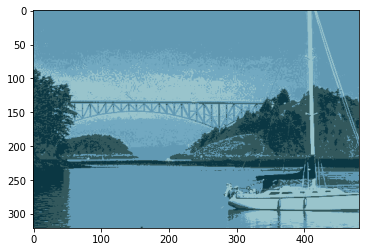

In [ ]:
data_image = cv2.cvtColor(data_image.astype(np.float32), cv2.COLOR_BGR2RGB)
labels = X["Cluster_positions"].to_numpy()

#overwritting the pixels values
image_centered = centroids[labels-1]
final_image = image_centered.reshape(data_image.shape)

#plotting the image
plt.imshow(final_image)

COMPARING WITH groUND truth

In [ ]:
f = open('/content/22090.seg')
img = cv2.imread("/content/22090.jpeg")
lines = f.readlines()
segarrlist = []
n_segments = int(lines[6].rstrip().split('segments')[1])
label_colours = np.random.randint(255,size=(100,3))
seg_img = np.zeros_like(img)
seg_data = lines[11:]
print(n_segments)
for i in range(n_segments):
  segarr = np.zeros_like(img)
  segarrlist.append(segarr)

for i in range(len(seg_data)):
  seg_data[i]=seg_data[i].rstrip()
df_arr=[]
for i in range(len(seg_data)):
  line = seg_data[i].split()
  line = list(map(int, line))
  df_arr.append(line)
  
for i in range(n_segments):
  for arr in df_arr:
    cluster, row, c1, c2 = arr
    #print(f'arr: {arr}')
    seg_img[row, c1:c2, :] = label_colours[cluster]
    segarrlist[cluster][row, c1:c2, :] = label_colours[cluster]

14


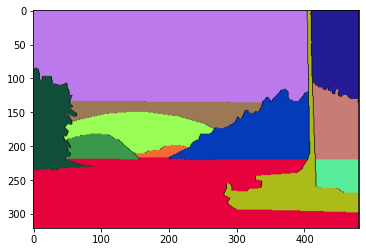

In [ ]:
plt.imshow(seg_img)

In [ ]:
import numpy as np
def get_iou(img_idx, seg_idx, image1, image2):
  intersection = np.logical_and(image1[img_idx],image2[seg_idx])
  union = np.logical_or(image1[img_idx],image2[seg_idx])
  iou_score = np.sum(intersection) / np.sum(union) if np.sum(union)>0 else 0
  return iou_score

In [ ]:
#creating img_list
result_image = final_image
unique_cols = np.unique(result_image.reshape(-1, result_image.shape[2]), axis=0)
print("unique pixels:",unique_cols)
blank_img = np.zeros_like(result_image)
mask_list = []
cnt=0
for pix in range(len(unique_cols)):
  print("^^^^^^^^^^^^^^",pix)
  #mask_list.append(blank_img)
  sample_img = np.zeros_like(result_image)
  print(sample_img.shape)

  sum=0
  for i in range(result_image.shape[0]):
    for j in range(result_image.shape[1]):
        if (np.array_equal(result_image[i][j],unique_cols[pix])):
          



          for k in range(result_image.shape[2]):

            sample_img[i,j,k]=result_image[i,j,k]
            
            sum=sum+1
  print(sum)
  cnt=cnt+1
  mask_list.append(sample_img)

unique pixels: [[0.04401973 0.21599771 0.2641291 ]
 [0.2011997  0.34670812 0.36193326]
 [0.38408893 0.6021117  0.70459735]
 [0.44723198 0.66547865 0.7576786 ]
 [0.60081255 0.76986897 0.8007614 ]]
^^^^^^^^^^^^^^ 0
(321, 481, 3)
47220
^^^^^^^^^^^^^^ 1
(321, 481, 3)
74166
^^^^^^^^^^^^^^ 2
(321, 481, 3)
217281
^^^^^^^^^^^^^^ 3
(321, 481, 3)
59454
^^^^^^^^^^^^^^ 4
(321, 481, 3)
65082


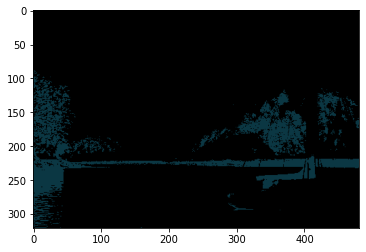

In [ ]:
plt.imshow(mask_list[0])

iou: 2.9410899679421194e-05
iou: 0.05163886327437338
iou: 0.0
iou: 0.2093845666631479
iou: 0.05517405817835003
iou: 0.162725484451513
iou: 0.0
iou: 0.0001811676253453508
iou: 0.0002522280141247688
iou: 0.02120450322439611
iou: 0.0
iou: 0.08979566331312878
iou: 0.0
iou: 0.03959840708957317


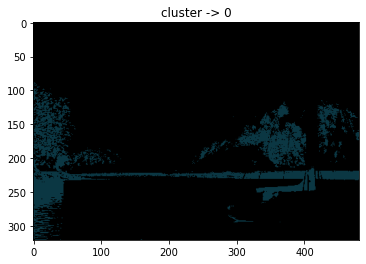

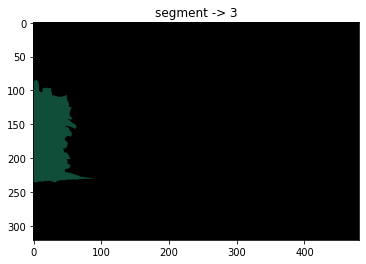

maxiou: 0.2093845666631479
iou: 0.00042883318389146623
iou: 0.04853054316048623
iou: 0.0005157610509389885
iou: 0.0997896624254336
iou: 0.18195288753799393
iou: 0.2342375612703955
iou: 0.0
iou: 0.019996059889676912
iou: 0.0021709218773887785
iou: 0.0863402567827555
iou: 0.0
iou: 0.07137614037540634
iou: 0.0
iou: 0.039357884796978285


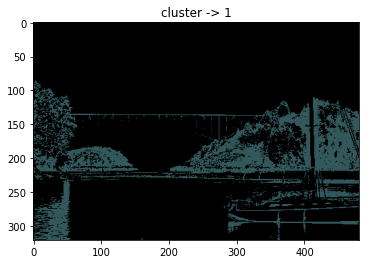

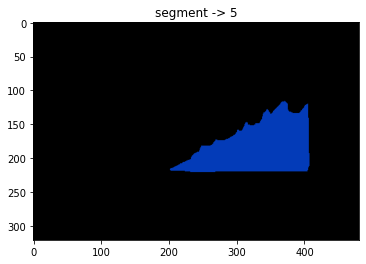

maxiou: 0.2342375612703955
iou: 0.33427856011642343
iou: 0.009679848875828775
iou: 0.10049785173566118
iou: 0.0031126737489445893
iou: 0.004703932691694818
iou: 0.012890770208530692
iou: 0.0
iou: 0.03768986549684491
iou: 0.017561826733424366
iou: 0.0045313395439340026
iou: 0.010589680928909691
iou: 0.28984049602423323
iou: 0.0
iou: 0.013363869055637882


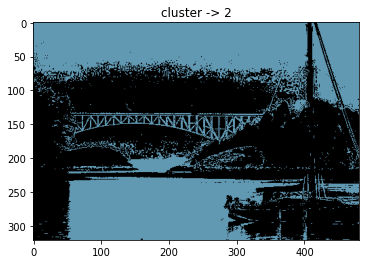

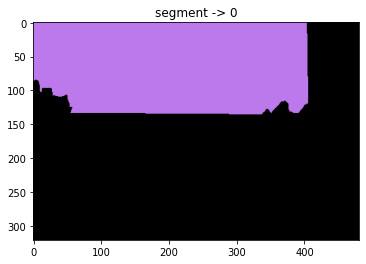

maxiou: 0.33427856011642343
iou: 0.20307101727447216
iou: 0.008087371258726758
iou: 0.012734028353955484
iou: 0.000778642936596218
iou: 0.0020266136433159986
iou: 0.002075928663542289
iou: 0.0
iou: 0.032643877792689666
iou: 0.24223381022418328
iou: 0.000483452731507933
iou: 9.715812484819043e-05
iou: 0.00809723835910269
iou: 0.0
iou: 0.001905183872396987


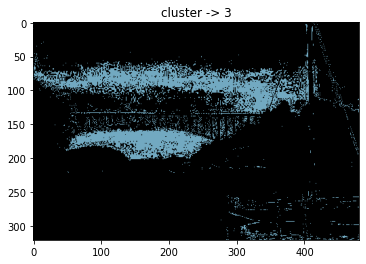

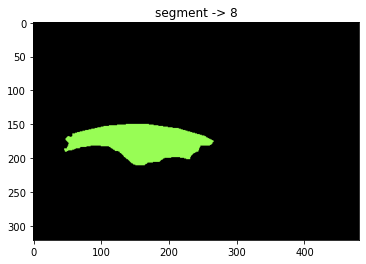

maxiou: 0.24223381022418328
iou: 0.1354571275044139
iou: 0.21641001528153286
iou: 0.017599891274802937
iou: 0.0015265586510772647
iou: 0.0006770721972774571
iou: 0.0010385756676557863
iou: 0.0
iou: 0.07855356799384497
iou: 0.04032173456898059
iou: 0.0003247807729782397
iou: 0.0
iou: 0.05881497901411777
iou: 4.609569466211856e-05
iou: 0.0004902561588429955


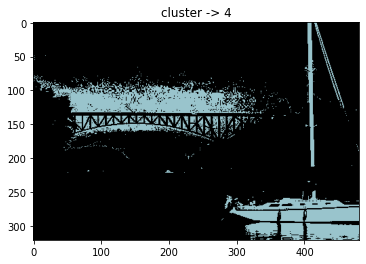

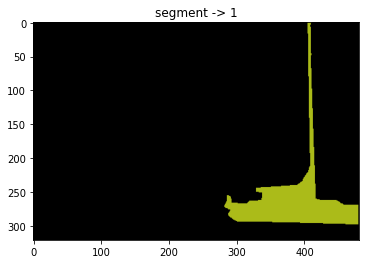

maxiou: 0.21641001528153286
maxiou overall: 0.33427856011642343
mean iou: 0.2473089027111366


In [ ]:
maxiou = 0
maxious = []
img_list = mask_list
for i in range(len(img_list)):
  ious = []
  
  for j in range(len(segarrlist)):
    iou_score = get_iou(i,j, img_list, segarrlist)
    print(f'iou: {iou_score}')
    ious.append(iou_score)
  maxj = np.argmax(ious)
  maxiou_loc = np.max(ious)
  maxious.append(maxiou_loc)
  maxiou = max(maxiou, maxiou_loc)

  plt.figure()
  plt.imshow(img_list[i])
  plt.title(f'cluster -> {i}')
  plt.show()
  plt.figure()
  plt.imshow(segarrlist[maxj])
  plt.title(f'segment -> {maxj}')
  plt.show()
  print(f'maxiou: {np.max(ious)}')

print(f'maxiou overall: {maxiou}')
print(f'mean iou: {np.mean(maxious)}')

  


# 23025

<h1><b>IMAGE 23025

In [ ]:
data_image = cv2.imread("/content/23025.jpeg")/255
data_image = cv2.cvtColor(data_image.astype(np.float32), cv2.COLOR_BGR2RGB)

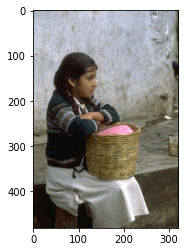

In [ ]:
plt.imshow(data_image)

In [ ]:
from pandas._libs.index import Int16Engine
from pandas.core.dtypes.common import is_1d_only_ea_obj
image_reshaped=data_image.reshape((-1,3))
#treating image as a dataframe
img_df = pd.DataFrame(image_reshaped)
img_df.rename(columns={0:'Red', 1:'Green', 2: 'Blue'}, inplace =True)

k_clusters = 5
diff = 1
check=0
img_df
X = img_df

In [ ]:
print(X)

             Red     Green      Blue
0       0.109804  0.149020  0.105882
1       0.109804  0.149020  0.105882
2       0.109804  0.149020  0.117647
3       0.117647  0.152941  0.133333
4       0.098039  0.133333  0.121569
...          ...       ...       ...
154396  0.258824  0.231373  0.160784
154397  0.254902  0.227451  0.156863
154398  0.298039  0.270588  0.200000
154399  0.298039  0.270588  0.200000
154400  0.309804  0.274510  0.207843

[154401 rows x 3 columns]


#Starting the while loop till the centroids are found

In [ ]:

while(abs(diff)>0.05):
    X_data=X
    i=1
    #iterate over each centroid point
    centroids = (X.sample(n = k_clusters))
    for i1,row_lev_cent in centroids.iterrows():
        error_dist=[]
        print("distance between=")
        for i2,row_lev_dist in tqdm(X_data.iterrows()):
            distn=np.sqrt(((row_lev_cent["Red"]-row_lev_dist["Red"])**2)
            +((row_lev_cent["Green"]-row_lev_dist["Green"])**2)
            +((row_lev_cent["Blue"]-row_lev_dist["Blue"])**2))
            error_dist.append(distn)
        X[i]=error_dist
        i+=1

    C_clust=[]
    print("reaching the centroid")
    for ind,row_iter in tqdm(X.iterrows()):
        lowest_distance=row_iter[1]
        position_index=1
        for i in range(k_clusters):
            m=i+1
            if row_iter[m] < lowest_distance:
                lowest_distance = row_iter[m]
                position_index=m
        C_clust.append(position_index)
    X["Cluster_positions"]=C_clust
    centroids_new = X.groupby(["Cluster_positions"]).mean()[["Red","Green", "Blue"]]
    if check == 0:
        diff=1
        check=check+1
    else:
        #check if there is a difference between old and new centroids
        diff = (centroids_new['Red'] - centroids['Red']).sum() 
        + (centroids_new['Green'] - centroids['Green']).sum() 
        + (centroids_new['Blue'] - centroids['Blue']).sum()
        print("Difference betwn old and NEW : ",diff.sum())
    centroids = X.groupby(["Cluster_positions"]).mean()[["Red","Green","Blue"]]

distance between=


154401it [00:13, 11368.41it/s]


distance between=


154401it [00:13, 11485.19it/s]


distance between=


154401it [00:13, 11433.51it/s]


distance between=


154401it [00:13, 11465.18it/s]


distance between=


154401it [00:13, 11521.29it/s]


reaching the centroid


154401it [00:12, 12182.19it/s]


distance between=


154401it [00:11, 13409.27it/s]


distance between=


154401it [00:11, 13492.57it/s]


distance between=


154401it [00:11, 13354.70it/s]


distance between=


154401it [00:11, 13111.43it/s]


distance between=


154401it [00:11, 13199.93it/s]


reaching the centroid


154401it [00:12, 12299.41it/s]


Difference betwn old and NEW :  0.0


In [ ]:
centroids

,Red,Green,Blue
Cluster_positions,,,
1,0.734498,0.691901,0.680469
2,0.516890,0.501653,0.442227
3,0.195212,0.165358,0.122884
4,0.682410,0.696324,0.728917
5,0.769501,0.777794,0.825359


In [ ]:
centroids = centroids.to_numpy()

In [ ]:
centroids

array([[0.73449796, 0.69190115, 0.68046886],
       [0.51688975, 0.5016535 , 0.44222692],
       [0.19521207, 0.16535756, 0.12288416],
       [0.6824103 , 0.6963243 , 0.72891736],
       [0.7695011 , 0.7777939 , 0.8253591 ]], dtype=float32)

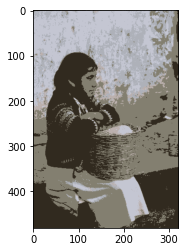

In [ ]:
data_image = cv2.cvtColor(data_image.astype(np.float32), cv2.COLOR_BGR2RGB)
labels = X["Cluster_positions"].to_numpy()

#overwritting the pixels values
image_centered = centroids[labels-1]
final_image = image_centered.reshape(data_image.shape)

#plotting the image
plt.imshow(final_image)

COMPARING WITH groUND truth

In [ ]:
f = open('/content/23025.seg')
img = cv2.imread("/content/23025.jpeg")
lines = f.readlines()
segarrlist = []
n_segments = int(lines[6].rstrip().split('segments')[1])
label_colours = np.random.randint(255,size=(100,3))
seg_img = np.zeros_like(img)
seg_data = lines[11:]
print(n_segments)
for i in range(n_segments):
  segarr = np.zeros_like(img)
  segarrlist.append(segarr)

for i in range(len(seg_data)):
  seg_data[i]=seg_data[i].rstrip()
df_arr=[]
for i in range(len(seg_data)):
  line = seg_data[i].split()
  line = list(map(int, line))
  df_arr.append(line)
  
for i in range(n_segments):
  for arr in df_arr:
    cluster, row, c1, c2 = arr
    #print(f'arr: {arr}')
    seg_img[row, c1:c2, :] = label_colours[cluster]
    segarrlist[cluster][row, c1:c2, :] = label_colours[cluster]

18


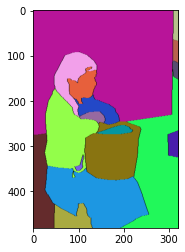

In [ ]:
plt.imshow(seg_img)

In [ ]:
import numpy as np
def get_iou(img_idx, seg_idx, image1, image2):
  intersection = np.logical_and(image1[img_idx],image2[seg_idx])
  union = np.logical_or(image1[img_idx],image2[seg_idx])
  iou_score = np.sum(intersection) / np.sum(union) if np.sum(union)>0 else 0
  return iou_score

In [ ]:
#creating img_list
result_image = final_image
unique_cols = np.unique(result_image.reshape(-1, result_image.shape[2]), axis=0)
print("unique pixels:",unique_cols)
blank_img = np.zeros_like(result_image)
mask_list = []
cnt=0
for pix in range(len(unique_cols)):
  print("^^^^^^^^^^^^^^",pix)
  #mask_list.append(blank_img)
  sample_img = np.zeros_like(result_image)
  print(sample_img.shape)

  sum=0
  for i in range(result_image.shape[0]):
    for j in range(result_image.shape[1]):
        if (np.array_equal(result_image[i][j],unique_cols[pix])):
          



          for k in range(result_image.shape[2]):

            sample_img[i,j,k]=result_image[i,j,k]
            
            sum=sum+1
  print(sum)
  cnt=cnt+1
  mask_list.append(sample_img)

unique pixels: [[0.19521207 0.16535756 0.12288416]
 [0.51688975 0.5016535  0.44222692]
 [0.6824103  0.6963243  0.72891736]
 [0.73449796 0.69190115 0.68046886]
 [0.7695011  0.7777939  0.8253591 ]]
^^^^^^^^^^^^^^ 0
(481, 321, 3)
147567
^^^^^^^^^^^^^^ 1
(481, 321, 3)
156345
^^^^^^^^^^^^^^ 2
(481, 321, 3)
60300
^^^^^^^^^^^^^^ 3
(481, 321, 3)
14193
^^^^^^^^^^^^^^ 4
(481, 321, 3)
84798


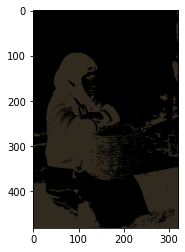

In [ ]:
plt.imshow(mask_list[0])

iou: 0.00469860611095726
iou: 0.004728179952517001
iou: 0.00046251608751608753
iou: 0.10732103021699453
iou: 0.00753360679039922
iou: 0.031833498513379584
iou: 0.18746850327565934
iou: 0.23388798216631504
iou: 0.041165522624026896
iou: 0.0
iou: 0.0038696741854636592
iou: 0.09872439813151275
iou: 3.987399816579609e-05
iou: 0.006975814511293224
iou: 0.08191644868441299
iou: 0.0020493050623922086
iou: 0.0231937359117333
iou: 0.06450563967076517


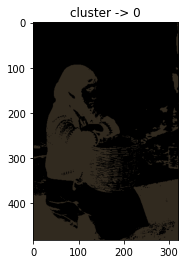

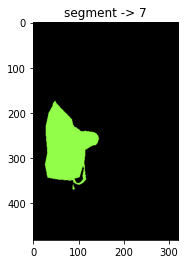

maxiou: 0.23388798216631504
iou: 0.13282992094060408
iou: 0.008989922125515346
iou: 0.010047360650394034
iou: 0.00193322535137677
iou: 0.001066930859069865
iou: 0.023225518293817693
iou: 0.1613737832678625
iou: 0.014026647506287
iou: 0.010072788765531946
iou: 0.0
iou: 0.012746765532134462
iou: 0.1061416833528965
iou: 0.0026252667762101723
iou: 0.015991308657035033
iou: 0.04972150282044914
iou: 0.0018385169296767274
iou: 0.22480884181127705
iou: 0.00028938848595561506


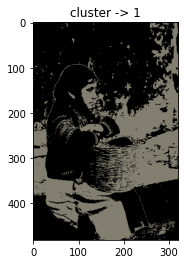

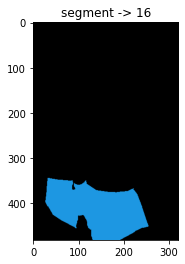

maxiou: 0.22480884181127705
iou: 0.3095883212637733
iou: 0.0018741890528136864
iou: 0.00038733417255737385
iou: 0.00035288582183186953
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.002284565475646532
iou: 0.001878221368044029
iou: 0.0
iou: 4.766898655734579e-05
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.02583414734460953
iou: 0.0


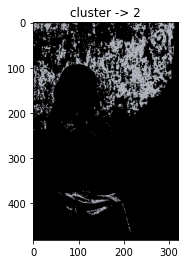

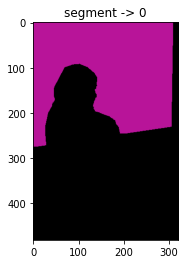

maxiou: 0.3095883212637733
iou: 0.05357814980280492
iou: 0.0003651634106262553
iou: 0.0013242527430949679
iou: 0.0
iou: 0.00019387359441644047
iou: 0.00039499670836076365
iou: 0.0018331805682859762
iou: 0.0012562096728144807
iou: 0.01000934205258241
iou: 0.0
iou: 0.003218884120171674
iou: 0.017737413141533584
iou: 0.08115282518012894
iou: 0.00033789491468153406
iou: 0.0
iou: 0.0
iou: 0.020842867246328577
iou: 0.0


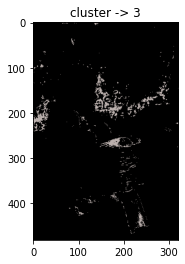

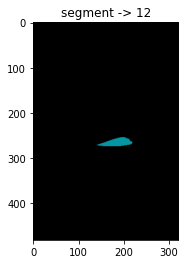

maxiou: 0.08115282518012894
iou: 0.3735372693611636
iou: 3.446730775859098e-05
iou: 0.0
iou: 2.9692974642199656e-05
iou: 0.0
iou: 0.0003213057867172188
iou: 0.001287648632879303
iou: 0.0014142202282258851
iou: 0.003678724708767627
iou: 0.0
iou: 0.0
iou: 0.000771125096390637
iou: 0.013941390671059477
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.07939466061926038
iou: 0.0


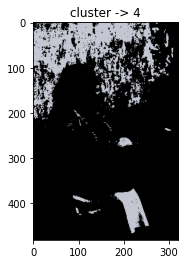

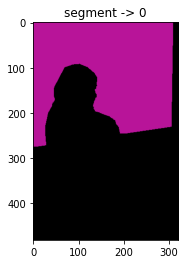

maxiou: 0.3735372693611636
maxiou overall: 0.3735372693611636
mean iou: 0.24459504795653159


In [ ]:
maxiou = 0
maxious = []
img_list = mask_list
for i in range(len(img_list)):
  ious = []
  
  for j in range(len(segarrlist)):
    iou_score = get_iou(i,j, img_list, segarrlist)
    print(f'iou: {iou_score}')
    ious.append(iou_score)
  maxj = np.argmax(ious)
  maxiou_loc = np.max(ious)
  maxious.append(maxiou_loc)
  maxiou = max(maxiou, maxiou_loc)

  plt.figure()
  plt.imshow(img_list[i])
  plt.title(f'cluster -> {i}')
  plt.show()
  plt.figure()
  plt.imshow(segarrlist[maxj])
  plt.title(f'segment -> {maxj}')
  plt.show()
  print(f'maxiou: {np.max(ious)}')

print(f'maxiou overall: {maxiou}')
print(f'mean iou: {np.mean(maxious)}')

  
